In [28]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [29]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256)


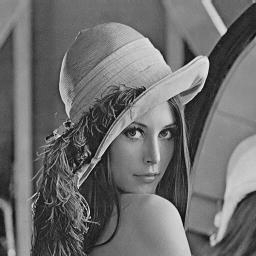

In [30]:
img1 = cv2.imread('/content/gdrive/My Drive/colab/images/lena256.jpg')
RGB_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gimg.shape)
# plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg)

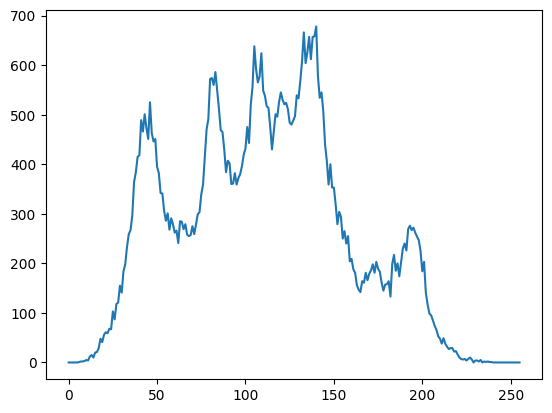

In [44]:
hist =cv2.calcHist([gimg],[0],None,[256],[0,256])
plt.plot(hist)


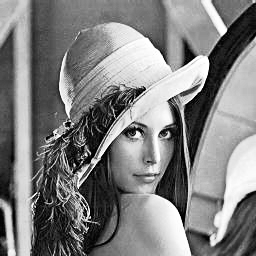

In [47]:
gOut =cv2.equalizeHist(gimg)
cv2_imshow(gOut)

(256, 1)


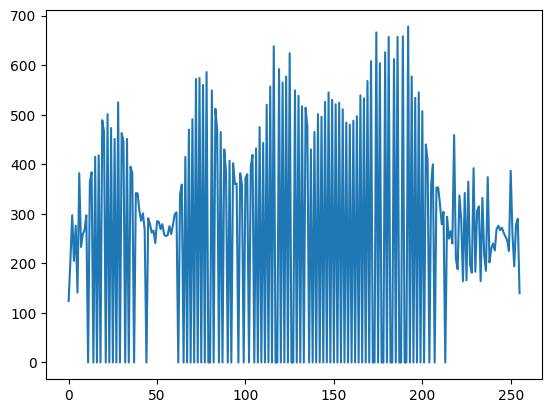

In [48]:
hist =cv2.calcHist([gOut],[0],None,[256],[0,256])
plt.plot(hist)
print(hist.shape)

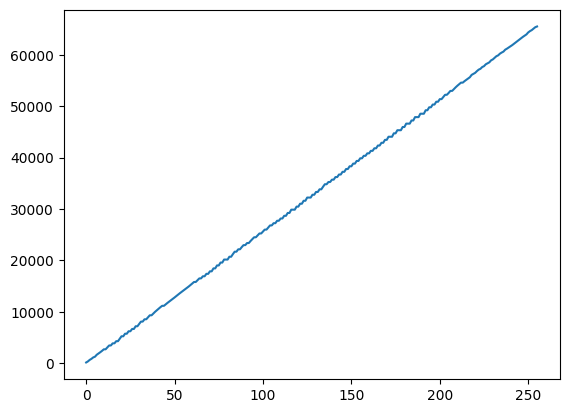

In [49]:
cumulHIST = hist.copy()

for i in range(1, 256):
  cumulHIST[i] = cumulHIST[i-1] + hist[i]

plt.plot(cumulHIST)


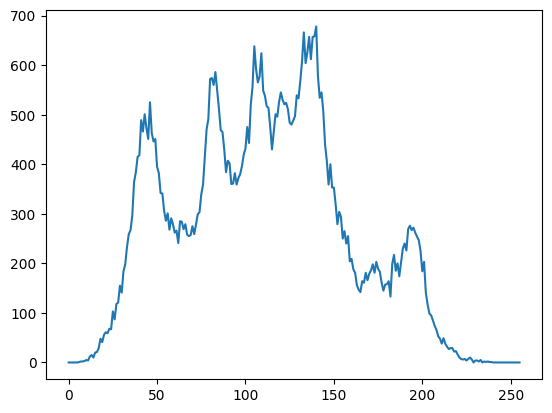

In [50]:
hist =cv2.calcHist([gimg],[0],None,[256],[0,256])
plt.plot(hist)


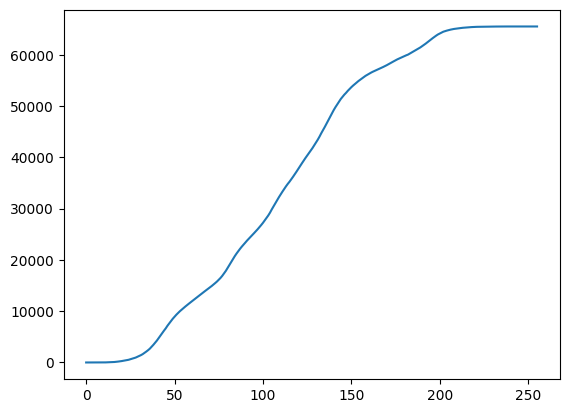

In [51]:
cumulHIST = hist.copy()

for i in range(1, 256):
  cumulHIST[i] = cumulHIST[i-1] + hist[i]

plt.plot(cumulHIST)

65536


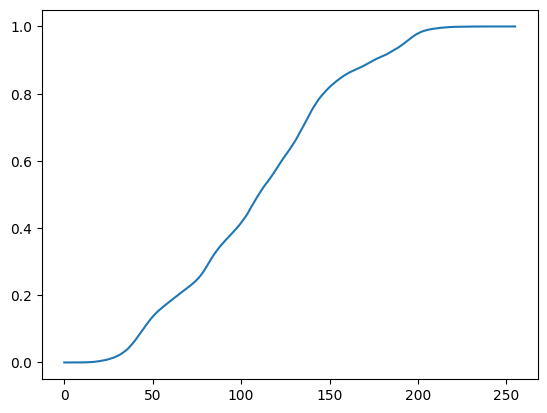

In [55]:
equalHist = cumulHIST.copy()
numOfPixels = np.int32(gOut.shape[0]*gOut.shape[1])
equalHist = equalHist/numOfPixels
print(numOfPixels)
plt.plot(equalHist)

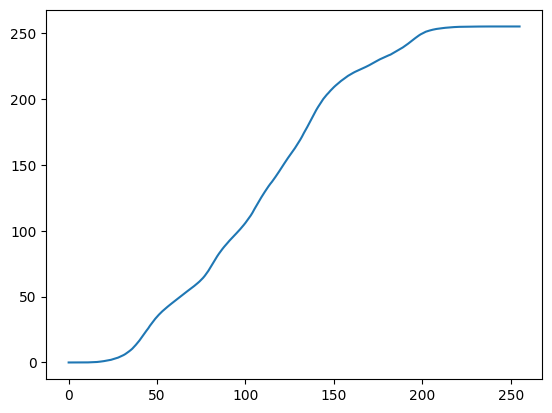

In [56]:
equalHist = equalHist * 255
plt.plot(equalHist)

<ipython-input-57-d6c3c9fa2322>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gOut[h,w] = equalHist[gOut[h,w]]


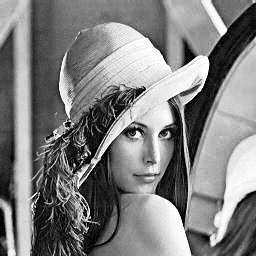

In [57]:
gOut = gimg.copy()
for h in range(gOut.shape[0]):
  for w in range(gOut.shape[1]):
    gOut[h,w] = equalHist[gOut[h,w]]

cv2_imshow(gOut)